In [45]:
# load data
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_target = wine.target
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [46]:
X = wine_df
y = wine_target

# split train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((133, 13), (133,), (45, 13), (45,))

In [47]:
# scaling
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [48]:
# kernel pca
from sklearn.decomposition import KernelPCA
k_pca = KernelPCA(n_components=2, kernel='poly')
k_pca.fit(X_train_std)
X_train_kpca = k_pca.transform(X_train_std)
X_test_kpca = k_pca.transform(X_test_std)

In [49]:
print(X_train_std.shape)
print(X_train_kpca.shape)

(133, 13)
(133, 2)


In [50]:
# eigen value, eigen vector
print(k_pca.lambdas_)
print(k_pca.alphas_)
print(k_pca.alphas_.shape)

[193.89824561 118.0368972 ]
[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]


c:\ProgramData\anaconda3\envs\taehyeok\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\anaconda3\envs\taehyeok\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `alphas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvectors_` instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
# dataset after kernel pca
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_train_kpca_df = pd.DataFrame(X_train_kpca, columns=kpca_columns)
X_train_kpca_df['target'] = y_train
X_train_kpca_df.head(10)

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0
5,-0.441326,-1.038163,1
6,-1.520805,0.997736,2
7,-1.574340,0.813941,2
8,1.214968,0.565490,0
9,-0.337134,-1.047036,1


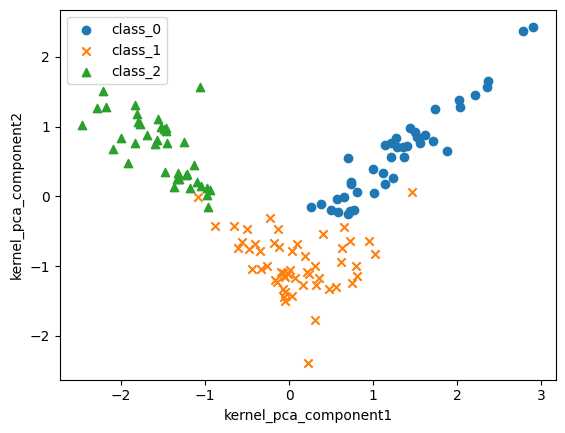

In [52]:
import matplotlib.pyplot as plt

df = X_train_kpca_df
markers = ['o', 'x', '^']

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    target_i = wine.target_names[i]
    X1 = X_i['kpca_comp1']
    X2 = X_i['kpca_comp2']
    plt.scatter(X1, X2,
                marker = mark,
                label=target_i)
plt.xlabel('kernel_pca_component1')
plt.ylabel('kernel_pca_component2')
plt.legend()
plt.show()

In [53]:
# training data
from sklearn.ensemble import RandomForestClassifier
RF_kpca = RandomForestClassifier(max_depth=2,
                                 random_state = 0)
RF_kpca.fit(X_train_kpca, y_train)
pred_RF_kpca = RF_kpca.predict(X_test_kpca)

In [54]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_kpca = accuracy_score(y_test, pred_RF_kpca)
print(accuracy_kpca)

0.9555555555555556
